Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r".\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path(r'.\Skin cancer ISIC The International Skin Imaging Collaboration\Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

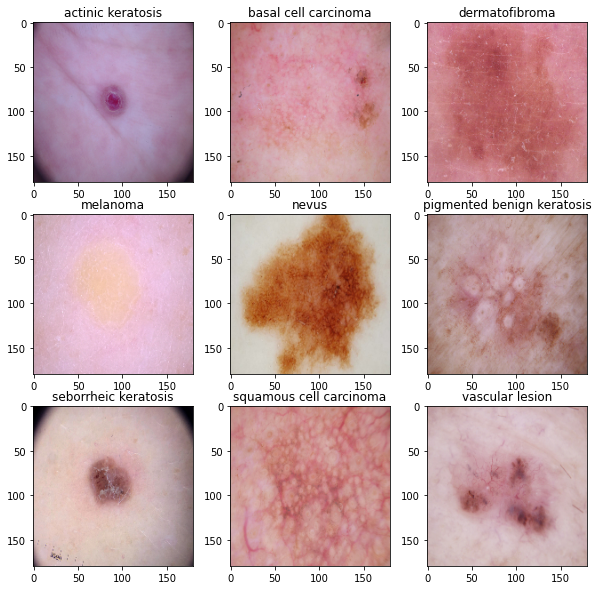

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(len(train_ds.class_names)):
        ax = plt.subplot(3,3, i +1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(train_ds.class_names[i])
        plt.axis('on')

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
num_classes = 9
input_shape = (180,180,3)

In [12]:

model = tf.keras.Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255))

model.add(layers.Conv2D(64, (3,3), activation='relu',input_shape = (180,180,3)))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),                                  
              metrics=['accuracy'])

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 44s 787ms/step - loss: 2.0935 - accuracy: 0.2193 - val_loss: 1.8968 - val_accuracy: 0.3356
Epoch 2/20
56/56 [==============================] - 42s 748ms/step - loss: 1.7587 - accuracy: 0.3644 - val_loss: 1.7187 - val_accuracy: 0.4004
Epoch 3/20
56/56 [==============================] - 43s 764ms/step - loss: 1.5971 - accuracy: 0.4336 - val_loss: 1.6696 - val_accuracy: 0.4452
Epoch 4/20
56/56 [==============================] - 42s 741ms/step - loss: 1.4554 - accuracy: 0.4888 - val_loss: 1.5167 - val_accuracy: 0.4609
Epoch 5/20
56/56 [==============================] - 41s 736ms/step - loss: 1.4373 - accuracy: 0.4827 - val_loss: 1.4441 - val_accuracy: 0.5145
Epoch 6/20
56/56 [==============================] - 41s 730ms/step - loss: 1.3018 - accuracy: 0.5363 - val_loss: 1.4058 - val_accuracy: 0.5168
Epoch 7/20
56/56 [==============================] - 41s 730ms/step - loss: 1.2682 - accuracy: 0.5592 - val_loss: 1.5024 - val_accuracy: 0.5123

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 128)       0

### Visualizing training results

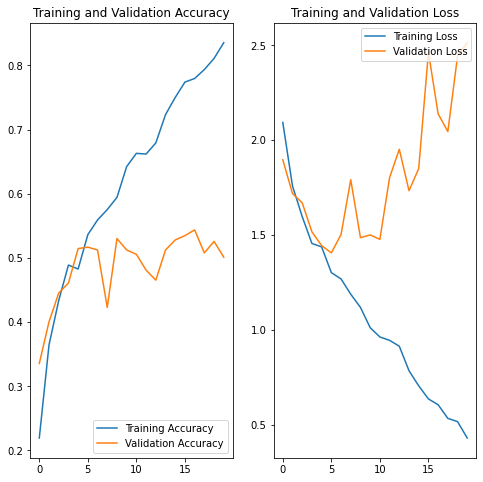

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
### As training loss is keep decreasing but validation loss is fluctuating and not learning any more. This is a clear situation of overfitting.
### To control overfitting, ther are use following options
### 1) Increase train data
### 2) Use regularization
### 3) Image augumenation

### First I will use image augmentation to control overfitting.


nevus


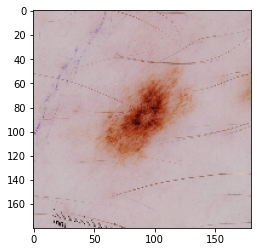

In [17]:
image, label  =next(iter(train_ds))
image = image[0].numpy().astype('uint8')
plt.imshow(image)
print(class_names[np.asarray(label[0])])

In [18]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])

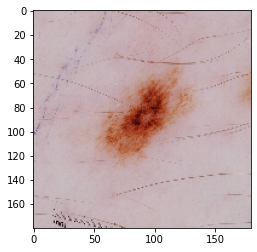

In [19]:
result = resize_and_rescale(image)
plt.imshow(result)

In [20]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

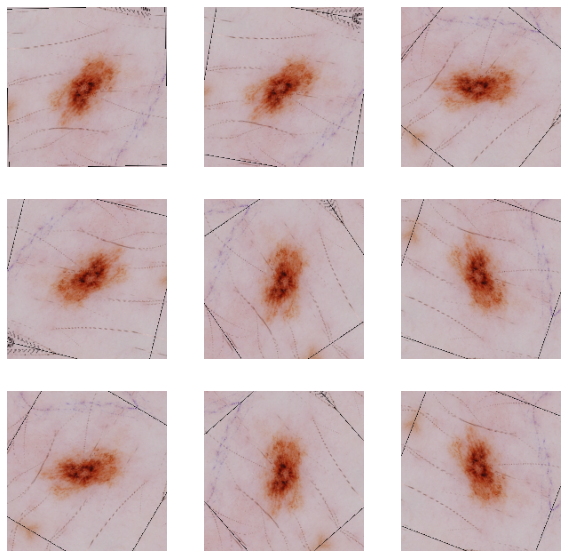

In [21]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
image = tf.expand_dims(image, 0)
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image) 
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [22]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model_with_drop_out = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,    
    
    layers.Conv2D(64, (3,3), activation='relu',input_shape = (180,180,3)),
    layers.MaxPooling2D(),
    Dropout(0.5),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    Dropout(0.5),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    Dropout(0.5),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

### Compiling the model

In [23]:
## Your code goes here
model_with_drop_out.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),                    
              #loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [24]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model_with_drop_out.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 49s 870ms/step - loss: 2.5402 - accuracy: 0.1897 - val_loss: 2.1088 - val_accuracy: 0.2819
Epoch 2/20
56/56 [==============================] - 48s 866ms/step - loss: 1.9561 - accuracy: 0.2695 - val_loss: 1.8772 - val_accuracy: 0.3110
Epoch 3/20
56/56 [==============================] - 48s 863ms/step - loss: 1.7826 - accuracy: 0.3527 - val_loss: 1.7279 - val_accuracy: 0.4183
Epoch 4/20
56/56 [==============================] - 49s 867ms/step - loss: 1.6406 - accuracy: 0.3968 - val_loss: 1.6170 - val_accuracy: 0.4564
Epoch 5/20
56/56 [==============================] - 50s 885ms/step - loss: 1.5355 - accuracy: 0.4442 - val_loss: 1.5502 - val_accuracy: 0.4340
Epoch 6/20
56/56 [==============================] - 49s 870ms/step - loss: 1.5564 - accuracy: 0.4498 - val_loss: 1.5731 - val_accuracy: 0.4497
Epoch 7/20
56/56 [==============================] - 48s 863ms/step - loss: 1.5445 - accuracy: 0.4442 - val_loss: 1.5629 - val_accuracy: 0.4183

### Visualizing the results

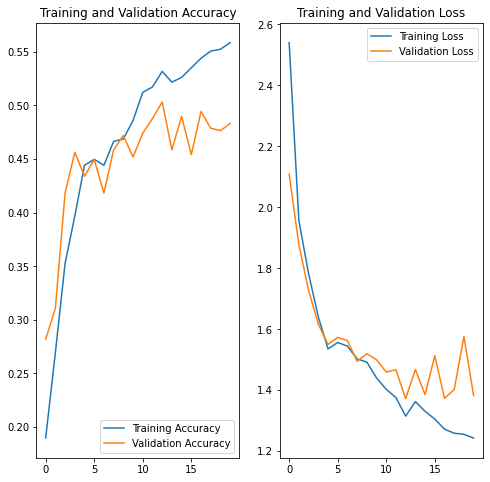

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
### By looking at the graph, model is not overfitting, however based upon accuracy it's not a good model.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [26]:
## Your code goes here.
folders = os.listdir(r".\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
folder_list = []
image_count_list = []
for folder in folders:
    folder_list.append(folder)
    cnt = len(os.listdir(os.path.join(r".\Skin cancer ISIC The International Skin Imaging Collaboration\Train",folder)))
    image_count_list.append(cnt)
    print(folder,cnt)

actinic keratosis 114
basal cell carcinoma 376
dermatofibroma 95
melanoma 438
nevus 357
pigmented benign keratosis 462
seborrheic keratosis 77
squamous cell carcinoma 181
vascular lesion 139


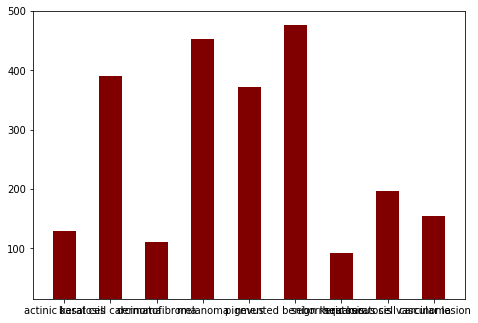

In [27]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.bar(folder_list,image_count_list,color ='maroon',width =0.5,bottom = 15)

plt.show()

#### **Todo:** Write your findings here: 
#### It seems, it's highly imabalnce data.

#### - Which class has the least number of samples?
#### 'seborrheic keratosis'  is having least number of samples.

#### - Which classes dominate the data in terms proportionate number of samples?
#### 'pigmented' benign keratosis' is having highest number of samples in training data.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [28]:
#!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [29]:
path_to_training_dataset=".\Skin cancer ISIC The International Skin Imaging Collaboration\Train\\"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to .\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25B8EBC9A60>: 100%|█| 500/500 [00:02<00:00, 221.73 Samples
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25B8638D8B0>:   5%| | 25/500 [00:00<00:03, 118.82 Samples/

Initialised with 376 image(s) found.
Output directory set to .\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25B8EA80BB0>: 100%|█| 500/500 [00:02<00:00, 222.72 Samples
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25B8EBF1610>:   3%| | 16/500 [00:00<00:05, 87.39 Samples/s

Initialised with 95 image(s) found.
Output directory set to .\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25B863DE9D0>: 100%|█| 500/500 [00:02<00:00, 222.32 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to .\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x25B8EB975E0>: 100%|█| 500/500 [00:09<00
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to .\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x25B863D88E0>: 100%|█| 500/500 [00:11<00:
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25B8EBB1E80>:   1%| | 5/500 [00:00<01:14,  6.62 Samples/s]

Initialised with 462 image(s) found.
Output directory set to .\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x25B863370D0>: 100%|█| 500/500 [00:02<00:
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x25B863D8FD0>:   1%| | 3/500 [00:00<00:3

Initialised with 77 image(s) found.
Output directory set to .\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x25B800B8D60>: 100%|█| 500/500 [00:05<00:00, 97.89 Samples
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25B86332940>:   4%| | 21/500 [00:00<00:09, 49.51 Samples/s

Initialised with 181 image(s) found.
Output directory set to .\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25B863480A0>: 100%|█| 500/500 [00:02<00:00, 220.26 Samples
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25B8EB820D0>:   5%| | 23/500 [00:00<00:09, 48.08 Samples/s

Initialised with 139 image(s) found.
Output directory set to .\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x25B86397C10>: 100%|█| 500/500 [00:02<00:


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [30]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [31]:
from glob import *

In [32]:
path_list = [x for x in glob(os.path.join(r'.\Skin cancer ISIC The International Skin Imaging Collaboration\Train', '*','output', '*.jpg'))]
path_list

['.\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_703f45c4-6340-4e44-b8bb-0537bb545d75.jpg',
 '.\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_d7ffcb33-45d7-40a2-9391-4288db71afc2.jpg',
 '.\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_3fb2fc1a-ae91-4901-8728-3757282c7ac1.jpg',
 '.\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_5303a60e-b862-410f-8933-c45be753dbaa.jpg',
 '.\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_7091e93e-87a2-4ac1-9f99-69063d849d17.jpg',
 '.\\Skin cancer ISIC The International Skin Imaging Co

In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [34]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [35]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [36]:
path_list = [x for x in glob(os.path.join(r'.\Skin cancer ISIC The International Skin Imaging Collaboration\Train', '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [37]:
path_list = [x for x in glob(os.path.join(r'.\Skin cancer ISIC The International Skin Imaging Collaboration\Train', '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict_original = dict(zip(path_list, lesion_list_new))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,.\Skin cancer ISIC The International Skin Imag...,actinic keratosis
1,.\Skin cancer ISIC The International Skin Imag...,actinic keratosis
2,.\Skin cancer ISIC The International Skin Imag...,actinic keratosis
3,.\Skin cancer ISIC The International Skin Imag...,actinic keratosis
4,.\Skin cancer ISIC The International Skin Imag...,actinic keratosis
...,...,...
2234,.\Skin cancer ISIC The International Skin Imag...,vascular lesion
2235,.\Skin cancer ISIC The International Skin Imag...,vascular lesion
2236,.\Skin cancer ISIC The International Skin Imag...,vascular lesion
2237,.\Skin cancer ISIC The International Skin Imag...,vascular lesion


In [38]:
new_df = original_df.append(df2)

In [39]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [40]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [41]:
data_dir_train= pathlib.Path(r'.\Skin cancer ISIC The International Skin Imaging Collaboration\Train')
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [42]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [43]:
## your code goes here
augumented_model = tf.keras.Sequential()
augumented_model.add(layers.experimental.preprocessing.Rescaling(1./255))
augumented_model.add(layers.Conv2D(64, (3,3), activation='relu',input_shape = (180,180,3)))
augumented_model.add(layers.MaxPooling2D())
augumented_model.add(Dropout(0.5))

augumented_model.add(layers.Conv2D(64, (3,3), activation='relu'))
augumented_model.add(layers.MaxPooling2D())
augumented_model.add(Dropout(0.5))

augumented_model.add(layers.Conv2D(128, (3,3), activation='relu'))
augumented_model.add(layers.MaxPooling2D())
augumented_model.add(Dropout(0.5))

augumented_model.add(layers.Flatten())
augumented_model.add(layers.Dense(128, activation='relu'))
augumented_model.add(layers.Dense(9))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [44]:
## your code goes here
augumented_model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),                                                
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [45]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', 
                               min_delta=0.001, 
                               patience=2, 
                               verbose=0, 
                               mode='min', 
                               baseline=None, 
                               restore_best_weights=False)

reduceLR  = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.1, 
                              patience=10, 
                              verbose=0, 
                              mode='auto', 
                              min_delta=0.002, 
                              cooldown=0, 
                              min_lr=0)

model_checkpoint_callback = ModelCheckpoint(filepath= "best_model.h5", 
                                            monitor='val_loss', 
                                            verbose=0, 
                                            save_best_only=True,                                             
                                            mode='min', 
                                            save_freq='epoch')

epochs = 30
## Your code goes here, use 50 epochs.
history = augumented_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  #callbacks=[early_stopping, reduceLR, model_checkpoint_callback]
  callbacks=[model_checkpoint_callback]
)

Epoch 1/30
169/169 [==============================] - 165s 976ms/step - loss: 2.3182 - accuracy: 0.1708 - val_loss: 1.9397 - val_accuracy: 0.2628
Epoch 2/30
169/169 [==============================] - 164s 971ms/step - loss: 1.6923 - accuracy: 0.3535 - val_loss: 1.7609 - val_accuracy: 0.3534
Epoch 3/30
169/169 [==============================] - 164s 969ms/step - loss: 1.5107 - accuracy: 0.4241 - val_loss: 1.5045 - val_accuracy: 0.4417
Epoch 4/30
169/169 [==============================] - 164s 969ms/step - loss: 1.3955 - accuracy: 0.4744 - val_loss: 1.5038 - val_accuracy: 0.4692
Epoch 5/30
169/169 [==============================] - 164s 971ms/step - loss: 1.3082 - accuracy: 0.5056 - val_loss: 1.3746 - val_accuracy: 0.4967
Epoch 6/30
169/169 [==============================] - 164s 968ms/step - loss: 1.2279 - accuracy: 0.5304 - val_loss: 1.2447 - val_accuracy: 0.5278
Epoch 7/30
169/169 [==============================] - 163s 965ms/step - loss: 1.1882 - accuracy: 0.5532 - val_loss: 1.2913 -

#### **Todo:**  Visualize the model results

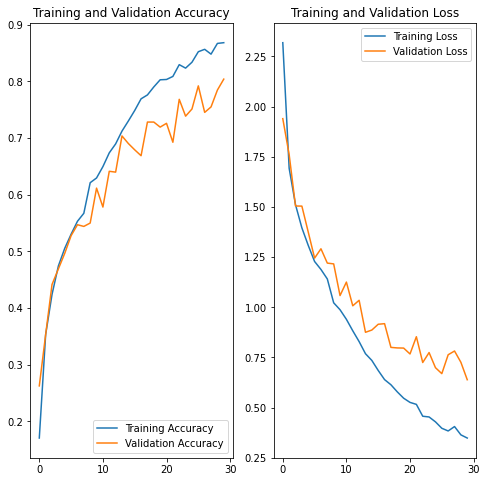

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Running Prediction on Test data to do qualitative analysis.

In [47]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.0,
  subset=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


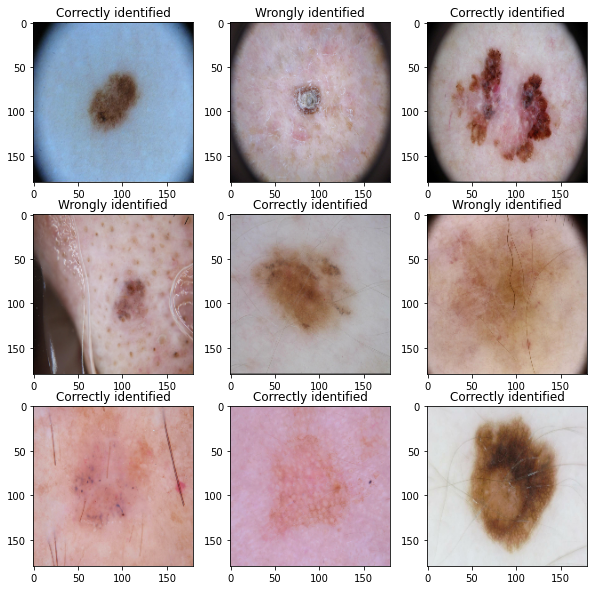

In [105]:
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
    for i in range(len(test_ds.class_names)):
        ax = plt.subplot(3,3, i +1)
        plt.imshow(images[i].numpy().astype('uint8'))
        if np.asarray(labels)[i] == np.argmax(augumented_model.predict(np.asarray([images[i].numpy()]))):            
            plt.title('Correctly identified')
        else:
            plt.title('Wrongly identified')
        plt.axis('on')
        

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



# Conclusion-
 ### After doing augmentation, we come over from overfitting the model.
 ### Class rebalance really helps to make a generalize the model.
 ### Model is doing really good as it's validation accuracy is more than 75%.


